## ***`myPersonality Data Project Outline`***
---
---
### 1. Understand Your Data

Before diving into modeling, understand the distribution, correlations, and any potential biases in your dataset. This will inform the kind of models you can create and their potential accuracy.

### 2. Predictive Modeling Approaches

#### a. Direct Predictions of Consumption Habits

- **Based on Big5 traits:** 
  
  You can create models that predict smoking_status, alcohol_status, and drug_status (or any other labels we want to join from the psychological questionnaires) based on the Big5 personality traits. This would involve models like logistic regression, random forest, gradient boosting machines, neural networks, etc. The primary input features would be the Big5 scores.

- **Based on LIWC features:**

   Since you have linguistic patterns from Facebook posts of these users, you can similarly create models to predict these consumption habits based on LIWC features.

- **Based on Big5 & LIWC**

- **Based on Big5, LIWC & Life Satisfaction**


#### b. Cascade Predictions

You first predict the Big5 traits based on the LIWC features and then use these predicted Big5 values to predict the consumption habits. This is a two-step process and can introduce errors at each step. However, it can provide interesting insights if you're more focused on the underlying process (i.e., understanding how language use predicts personality and how personality, in turn, predicts consumption habits).

-> Cascade refers to how the prediction flows from one stage to the next, akin to a waterfall or cascade, where the output of one layer flows down to the next. This approach can be helpful when you have a structured process or a strong hypothesis about the sequence in which phenomena occur.

***`Hypothesis:`*** `"A predictive model for consumption habits may be more effective if it includes inferred Big5 personality traits from linguistic analysis as inputs."`

#### c. Unified Predictions

Predict both Big5 traits and consumption habits directly from the LIWC features using a multilayer neural network or multi-output regression models. This approach can leverage any shared patterns in the linguistic data that might predict both personality and consumption habits.

   - link: https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/

### 3. Feature Engineering

Consider creating interaction terms between Big5 traits or deriving new features from the LIWC dataset that might have a stronger relationship with consumption habits. Feature selection techniques can be used to retain only those features that significantly contribute to the predictive power of the model.

### 4. Text-Derived Features

Beyond LIWC, consider other NLP methods or features derived directly from the text that might capture unique patterns related to consumption behaviors. For example:

- **TF-IDF:** Weigh terms based on their importance in a document relative to the entire corpus.

- **Topic Modeling (e.g., LDA = Latent Dirichlet Allocation):** Understand overarching topics in the posts, which could be related to consumption behaviors.

> As you know, the key to successful feature engineering is experimentation and domain knowledge. It's essential to understand the underlying data and hypotheses about what might influence consumption behaviors.

---

### Creating a Research Paper

Comparing prediction models using different feature sets (Big5 traits, LIWC features, and a combination of both) would provide valuable insights to the scientific community.

#### Advantages of Comparative Analysis in our Final Paper

- **Comprehensive Evaluation:** By comparing different feature sets, you can evaluate the unique and shared predictive powers of Big5 traits and LIWC linguistic patterns (or any NLP features).

- **Model Robustness:** Demonstrating that certain findings are consistent across models increases confidence in the robustness and generalizability of the results.

- **Interdisciplinary Appeal:** Your research can bridge the gap between psycholinguistics, personality psychology, and computational modeling, making it relevant to multiple fields.

- **Highlight Novel Insights:** Using a diverse set of features might reveal unexpected patterns or relationships that neither feature set would uncover on its own.

- **Guidance for Future Research:** By comparing the performance of different feature sets, you provide guidance for other researchers on which features might be most promising for predicting consumption behaviors.

---

### Additional Investigation Ideas
1. **Sentiment Analysis**: Analyze sentiment correlation with traits and habits.
2. **Behavioral Patterns**: Investigate posting patterns and engagement metrics.
3. **Psycholinguistic Analysis**: Explore tools beyond LIWC for deeper linguistic insights.
4. **Social Network Analysis**: Examine influence of Facebook network structure.
5. **Temporal Analysis**: Study changes in language use, traits, and habits over time.
6. **External Validation**: Validate findings with external data or experiments.
7. **Ethical Considerations**: Discuss ethical implications and privacy concerns.

## ***Import Base Libraries:***
---

In [1]:
import pandas as pd

# enable to see all columns:
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

from typing import List, Any
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## ***Helper Functions:***
---

In [2]:
from helper_functions import (
                        check_common_ids,
                        display_data_shape,
                        plot_continuous_features_target,
                        plot_target_ratios,
                        classification_evaluation_report,
                        threshold_analysis_barplot,
                        threshold_analysis_lineplot,
                        feature_importance_plot,
                        regressor_evaluator
)

## **`a) Direct Predictions of Consumption Habits`**

---

##### In the first study the **merged data set** between *consumption behavior*, *Big5* and *LIWC* features will be used to directly predict the consumption behavior. The following steps are considered to predict consumption behavior individually and lastly with both feature sets. Here it is first examined how `XGBoostClassifier` will perform as a `base model` without extensive hyperparameter tuning and statistical feature selection. Afterwards feature selection techniques and fine tuning will be introduced to eventually boost performance. A filter in terms of the block column is supposed to be evaluated whether performance can be boosted in that fashion, as the big5 traits are more accurate when people have answered more questions in the respective questionnaire.

### 1) **`Base Model Run`**
##### Predict consumption behavior based on:

- **1.1) BIG5**

- **1.2) LIWC Features**

- **1.3) Big5 and LIWC**


### 2) **`Feature Selection & Fine Tuning`**


### **Read Data:**

In [3]:
df1 = pd.read_parquet("merged_data/df_consumption_big5_liwc.parquet")
display_data_shape(df1)
print()
print(f"Duplicate ids: {df1['userid'].duplicated().any()}")
print(f"Missing values: {df1.isna().any().any()}")
df1.head()

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,082
 - Number of columns: 109

Duplicate ids: False
Missing values: False


,userid,smoking_status,alcohol_status,drug_status,ope,con,ext,agr,neu,blocks,dominant_trait,dt_agr,dt_con,dt_ext,dt_neu,dt_ope,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,ba4d96426226699b8c511ce0bee75941,True,True,True,3.25,3.60,3.68,3.60,3.1,100,ext,0,0,1,0,0,7197,43.31,59.44,60.57,44.88,19.94,11.39,82.03,45.07,15.92,11.45,6.27,0.42,3.49,0.51,0.76,4.47,4.15,9.11,7.95,4.71,5.46,2.08,17.13,4.59,1.70,1.56,2.15,1.76,7.54,4.28,3.24,0.24,1.29,0.58,11.17,1.36,0.53,1.29,0.83,10.56,2.32,1.13,1.90,2.24,1.35,3.36,3.06,1.14,0.60,1.08,3.97,1.28,1.18,0.50,0.71,7.25,2.47,0.82,2.18,1.93,0.43,2.90,12.95,1.74,13.07,2.14,5.66,5.29,0.76,1.46,0.79,0.76,0.40,0.21,7.35,0.97,5.54,0.25,0.42,0.04,31.15,2.96,1.65,0.79,0.07,2.88,17.02,0.40,0.69,2.50,0.49,1.70
1,1a388284961e77942bae7a0ead109eea,False,True,False,3.00,1.75,5.00,2.50,2.0,20,ext,0,0,1,0,0,4025,35.20,73.85,50.29,70.64,8.67,10.71,81.66,46.26,18.76,14.16,7.08,0.77,5.47,0.40,0.45,4.60,4.05,8.99,8.52,4.57,5.44,1.57,17.89,5.19,1.79,1.49,4.89,1.27,9.69,5.96,3.58,0.37,1.57,0.50,12.50,0.42,0.75,0.65,0.72,10.01,1.91,1.61,2.09,2.19,1.69,2.11,3.38,1.49,0.92,0.62,4.47,1.86,0.70,0.55,0.87,7.18,2.78,0.75,2.01,1.96,0.37,2.53,12.45,2.21,12.42,1.91,5.84,4.89,0.77,1.59,0.17,0.22,0.30,0.47,4.37,1.59,2.36,0.25,0.25,0.00,38.63,13.59,5.86,2.46,0.32,1.74,1.74,1.09,1.81,4.45,1.59,3.98
2,ec539b2398f80d1f395ba4cc06c230a7,False,False,False,3.75,3.30,3.15,4.30,2.6,100,agr,1,0,0,0,0,2741,51.55,71.78,53.26,90.03,13.77,14.19,86.25,51.77,14.52,10.69,4.85,1.31,2.59,1.61,0.33,3.83,5.25,12.29,10.40,5.18,5.87,1.53,19.41,4.38,0.95,1.64,1.35,1.50,7.88,5.87,2.01,0.04,0.36,0.84,10.65,0.47,0.40,1.39,0.80,8.79,1.64,0.73,1.64,2.19,1.64,2.26,2.48,1.28,0.40,0.66,2.59,0.58,0.95,0.00,0.51,7.66,3.06,0.91,1.68,1.97,0.29,5.18,12.81,3.47,15.98,2.59,6.09,7.59,1.42,1.79,1.39,0.26,1.17,0.11,2.23,0.15,1.06,0.36,0.51,0.00,20.32,7.00,4.52,0.95,0.11,0.33,3.83,0.47,0.44,2.19,0.26,0.22
3,0e0b122ce777606ae73dd055d76fc1c7,False,False,False,3.95,2.60,1.75,3.15,2.4,336,ope,0,0,0,0,1,5,8.19,50.00,1.00,1.00,1.67,20.00,80.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,120.00,40.00,0.00,0.00,0.00,20.00,60.00,0.00,0.00,0.00,0.00,0.00
4,58bcb86a962fc98d2feb5e3562ac45c0,True,True,False,4.25,3.25,4.75,3.00,3.0,20,ext,0,0,1,0,0,1548,48.77,42.07,79.91,77.98,8.70,12.21,86.95,48.45,15.44,10.01,7.69,0.65,1.03,0.32,0.32,5.43,5.56,10.53,9.63,5.81,4.65,1.49,18.22,5.17,1.61,1.36,3.68,2.00,6.91,4.84,2.00,0.19,0.45,0.26,7.69,0.90,0.26,0.32,0.84,9.04,1.42,0.97,2.20,2.13,1.36,2.07,2.78,1.10,0.71,0.58,3.49,0.90,0.97,0.00,1.49,6.65,2.26,1.61,1.68,1.87,0.26,3.49,13.44,2.91,17.38,3.04,5.17,9.69,2.26,3.04,0.26,0.58,0.45,0.06,2.97,0.13,1.74,0.71,0.52,0.06,45.09,18.54,1.68,0.19,0.06,1.61,12.14,1.49,1.16,4.13,1.49,2.58


In [4]:
# type cast targets from bool to int
targets  = ['smoking_status', 'alcohol_status', 'drug_status']
df1[targets] = df1[targets].astype(int)

### `Filter regarding Blocks?`

In [ ]:
larger_than_x = int(input("Enter threshold: "))

df1 = df1.query("blocks >= @larger_than_x")

print(f"Filter threshold: {larger_than_x}\n")

display_data_shape(df1)

### **Stratified train-test-split**

In [5]:
from sklearn.model_selection import train_test_split

# define target and features
targets  = ['smoking_status', 'alcohol_status', 'drug_status']
features = [c for c in df1.columns if c not in targets]

# define X and y
X = df1[features]

y_smoking  = df1['smoking_status']
y_alcohol  = df1['alcohol_status']
y_drug     = df1['drug_status']

# split data for each of the three targets into train and test sets:

'Smoking'
X_train_smoke, X_test_smoke, \
    y_train_smoke, y_test_smoke = train_test_split(
                                            X, y_smoking, test_size=0.2, stratify=y_smoking, random_state=42
    )

'Alchohol'
X_train_alc, X_test_alc, \
    y_train_alc, y_test_alc = train_test_split(
                                            X, y_alcohol, test_size=0.2, stratify=y_alcohol, random_state=42
    )

'Drugs'
X_train_drug, X_test_drug, \
    y_train_drug, y_test_drug = train_test_split(
                                            X, y_drug, test_size=0.2, stratify=y_drug, random_state=42
    )

### **Target Variable Distribution**

In [375]:
plot_target_ratios(
                df      = df1,
                targets = ['smoking_status', 'alcohol_status', 'drug_status']
)

#### **Weight Computations for Model Training**

In [6]:
# select label frequencies
class_0_smoke, class_1_smoke = y_train_smoke.value_counts()[0], y_train_smoke.value_counts()[1]
class_0_alc, class_1_alc     = y_train_alc.value_counts()[0], y_train_alc.value_counts()[1]
class_0_drug, class_1_drug   = y_train_drug.value_counts()[0], y_train_drug.value_counts()[1]

# compute class weights for each target:
# -> formula = n negative samples / n positive samples
weight_smoke = round(class_0_smoke / class_1_smoke, 2)
weight_alc   = round(class_0_alc / class_1_alc, 2)
weight_drugs = round(class_0_drug / class_1_drug, 2)

# display as dataframe
pd.DataFrame(
        data    = [[weight_smoke, weight_alc, weight_drugs]],
        columns = ['smoking_status', 'alcohol_status', 'drug_status'],
        index   = ['weights']
).transpose()

,weights
smoking_status,3.14
alcohol_status,1.11
drug_status,4.44


#### **Feature Sets**

In [7]:
ocean      = ['ope', 'con', 'ext', 'agr', 'neu']
liwc       = df1.columns[16:].to_list()
ocean_liwc = ocean + liwc

### ***`1) Base Model Run`***
---

#### **1.1) `Predict Consumption Behavior Based on BIG5 Traits`**
---

##### - Discrete Dominant Trait Distribution:

In [ ]:
fig = plt.figure(figsize=(5, 3))
ocean = ['ope', 'con', 'ext', 'agr', 'neu']
sns.countplot(data=df1, x='dominant_trait', hue='dominant_trait', edgecolor='black', linewidth=0.5, palette='magma', order=ocean)
plt.title('Distribution of Dominant Traits', fontsize=16, weight='bold')
print(f"Interpretation:\n{10*'~'}\n--> Openness is most dominant for obvious reasons, since people who are rather open are more likely to take part in a study like this.");

##### - Contiuous Trait Distributions:

In [ ]:
names = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Distribution of BIG5 Traits', fontsize=22, weight='bold')

for idx, trait in enumerate(ocean):
    sns.histplot(data=df1, x=trait, color='midnightblue', ax=ax[idx], kde=True, fill=True, edgecolor='black', linewidth=0.5)
    ax[idx].set_title(f"{names[idx]}", fontsize=16)
    ax[idx].set_xlabel('')

fig.tight_layout();

##### - Correlation among traits:

In [ ]:
titles = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

fig = plt.figure(figsize=(5, 4))
fig.suptitle('Correlation Matrix of Big 5 Traits', fontsize=16, weight='bold', x=0.4)
traits_corr_matrix = df1[ocean].corr()
sns.heatmap(
        traits_corr_matrix, annot=True, cmap='magma', linewidths=0.5,
        annot_kws={'size': 12}, fmt=".2f", xticklabels=titles, yticklabels=titles
)
plt.xticks(rotation=45);

##### **1.1.1) Predict Smoking Status based on BIG5**

In [84]:
from xgboost import XGBClassifier
from sklearn import metrics

- ***Fit Base Model***

In [ ]:
xgb1 = XGBClassifier(
                n_estimators     = 650,
                max_depth        = 3,
                learning_rate    = 0.0175,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_smoke,
                random_state     = 42
)

xgb1.fit(
    X_train_smoke[ocean],
    y_train_smoke
)

- ***Evaluate Base Model on Train & Test***

In [ ]:
classification_evaluation_report(
                            model       = xgb1,
                            X           = X_train_smoke[ocean],
                            y           = y_train_smoke,
                            title_suffix = 'Train Set',
                            figsize      = (10, 3.5)
)

In [ ]:
classification_evaluation_report(
                            model       = xgb1,
                            X           = X_test_smoke[ocean],
                            y           = y_test_smoke,
                            title_suffix = 'Test Set'
)

- ***Discrimination Threshold Analysis***

In [ ]:
threshold_analysis_barplot(
                            model       = xgb1,
                            X           = X_test_smoke[ocean],
                            y           = y_test_smoke,
                            thresholds  = np.arange(0.20, 0.8, 0.05).round(2),
                            figsize      = (10, 3.75)
)

In [ ]:

threshold_analysis_lineplot(xgb1, X_test_smoke[ocean], y_test_smoke, num_thresholds=15)

- ***Evaluate Model with adjusted Threshold***

In [ ]:
classification_evaluation_report(
                            model       = xgb1,
                            X           = X_train_smoke[ocean],
                            y           = y_train_smoke,
                            threshold   = 0.6,
                            title_suffix = 'Train Set'
)

In [ ]:
classification_evaluation_report(
                            model       = xgb1,
                            X           = X_test_smoke[ocean],
                            y           = y_test_smoke,
                            threshold   = 0.6,
                            title_suffix = 'Test Set'
)

- ***Feature Importances***

In [ ]:
feature_importance_plot(
                    model         = xgb1,
                    feature_names = ocean,
                    figsize        = (4, 2),
                    horizontal    = False
)

##### **1.1.2) Predict Alchohol Status based on BIG5**


- ***Fit Base Model***

In [ ]:
xgb2 = XGBClassifier(
                n_estimators  = 750,
                max_depth     = 3,
                learning_rate = 0.015,
                verbosity     = 1,
                objective     = 'binary:logistic',
                random_state  = 42
)

xgb2.fit(
    X_train_alc[ocean],
    y_train_alc
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                            model       = xgb2,
                            X           = X_train_alc[ocean],
                            y           = y_train_alc,
                            title_suffix = 'Train Set'
)

In [ ]:
classification_evaluation_report(
                            model       = xgb2,
                            X           = X_test_alc[ocean],
                            y           = y_test_alc,
                            title_suffix = 'Test Set'
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model         = xgb2,
                    feature_names = ocean,
                    figsize        = (4, 3),
                    horizontal    = False
)

##### **1.1.3) Predict Drug Status based on BIG5**

- ***Fit Base Model***

In [ ]:
xgb3 = XGBClassifier(
                n_estimators     = 750,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_drugs,
                random_state     = 42
)

xgb3.fit(
    X_train_drug[ocean],
    y_train_drug
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                        model = xgb3,
                        X = X_train_drug[ocean],
                        y = y_train_smoke,
                        threshold = 0.5,
                        title_suffix = 'Train'
)

In [ ]:
classification_evaluation_report(
                        model = xgb3,
                        X = X_test_drug[ocean],
                        y = y_test_smoke,
                        threshold = 0.5,
                        title_suffix = 'Test'
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model         = xgb3,
                    feature_names = ocean,
                    figsize        = (4, 3),
                    horizontal    = False
)

#### **1.2) `Predict Consumption Behavior Based on LIWC`**
---

##### **1.2.1) Predict Smoking Status based on LIWC**

- ***Fit Base Model***

In [88]:
xgb1 = XGBClassifier(
                n_estimators     = 250,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_smoke,
                random_state     = 42
)

xgb1.fit(
    X_train_smoke[liwc],
    y_train_smoke
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

- ***Evaluate Base Model***

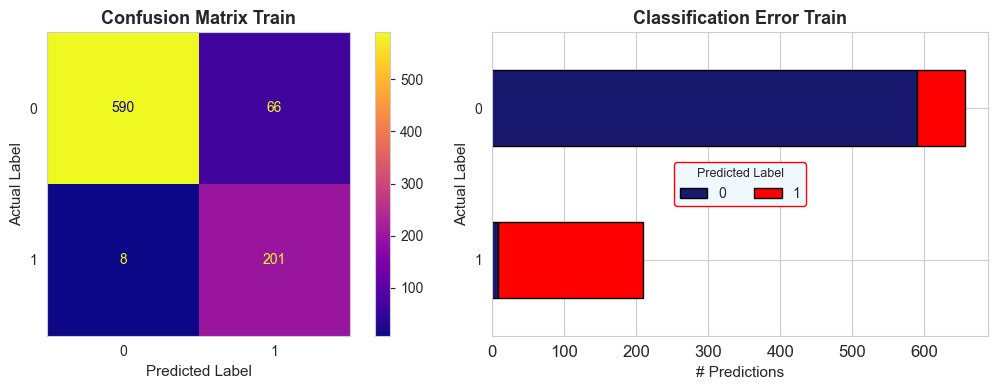

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 656 (76.0%)
- Class 1: 209 (24.0%)

Classification Report Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.986622,0.899390,0.940989,656.000000
1,0.752809,0.961722,0.844538,209.000000
accuracy,0.914451,0.914451,0.914451,0.914451
macro avg,0.869716,0.930556,0.892763,865.000000
weighted avg,0.930129,0.914451,0.917684,865.000000


In [89]:
classification_evaluation_report(
                        model = xgb1,
                        X = X_train_smoke[liwc],
                        y = y_train_smoke,
                        threshold = 0.5,
                        title_suffix = 'Train'
)

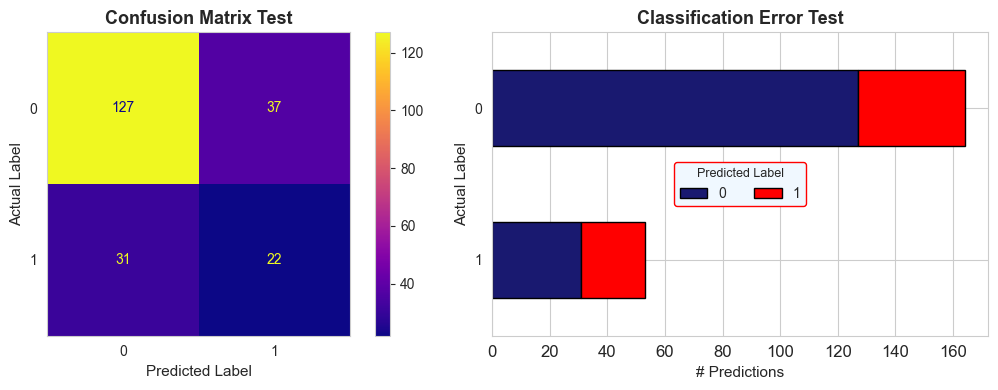

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 164 (76.0%)
- Class 1: 53 (24.0%)

Classification Report Test:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.803797,0.774390,0.788820,164.000000
1,0.372881,0.415094,0.392857,53.000000
accuracy,0.686636,0.686636,0.686636,0.686636
macro avg,0.588339,0.594742,0.590839,217.000000
weighted avg,0.698551,0.686636,0.692110,217.000000


In [90]:
classification_evaluation_report(
                        model = xgb1,
                        X = X_test_smoke[liwc],
                        y = y_test_smoke,
                        threshold = 0.5,
                        title_suffix = 'Test'
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model = xgb1,
                    feature_names=liwc,
                    figsize=(28, 4),
                    horizontal=False
)

##### **1.2.2) Predict Alcohol Status based on LIWC**

- ***Fit Base Model***

In [ ]:
xgb2 = XGBClassifier(
                n_estimators     = 750,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                random_state     = 42
)

xgb2.fit(
    X_train_alc[liwc],
    y_train_alc
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                    model = xgb2,
                    X = X_train_alc[liwc],
                    y = y_train_alc,
                    threshold = 0.5,
                    title_suffix = "Train"
)

In [ ]:
classification_evaluation_report(
                    model = xgb2,
                    X = X_test_alc[liwc],
                    y = y_test_alc,
                    threshold = 0.5,
                    title_suffix = "Test"
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model = xgb2,
                    feature_names=liwc,
                    figsize=(28, 4),
                    horizontal=False
)

##### **1.2.3) Predict Drug Status based on LIWC**

- ***Fit Base Model***

In [ ]:
xgb3 = XGBClassifier(
                n_estimators     = 750,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_drugs,
                random_state     = 42
)

xgb3.fit(
    X_train_drug[liwc],
    y_train_drug
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                    model = xgb3,
                    X = X_train_drug[liwc],
                    y = y_train_drug,
                    threshold = 0.5,
                    title_suffix = "Train"
)

- ***Threshold Analysis***

In [ ]:
classification_evaluation_report(
                    model = xgb3,
                    X = X_test_drug[liwc],
                    y = y_test_drug,
                    threshold = 0.5,
                    title_suffix = "Test"
)

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model = xgb3,
                    feature_names=liwc,
                    figsize=(28, 4),
                    horizontal=False
)

#### **1.3) `Predict Consumption Behavior Based on BIG5 Traits & LIWC`**
---

#### **1.3.1) Predict Smoking Status**

- ***Fit Base Model***

In [ ]:
xgb1 = XGBClassifier(
                n_estimators     = 750,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_smoke,
                random_state     = 42
)

xgb1.fit(
    X_train_smoke[ocean_liwc],
    y_train_smoke
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                    model = xgb1,
                    X = X_train_smoke[ocean_liwc],
                    y = y_train_smoke,
                    threshold = 0.5,
                    title_suffix = "Train"
)

In [ ]:
classification_evaluation_report(
                    model = xgb1,
                    X = X_test_smoke[ocean_liwc],
                    y = y_test_smoke,
                    threshold = 0.5,
                    title_suffix = "Test"
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model = xgb1,
                    feature_names=ocean_liwc,
                    figsize=(28, 4),
                    horizontal=False
)

##### **1.3.2) Predict Alcohol Status**

- ***Fit Base Model***

In [ ]:
xgb2 = XGBClassifier(
                n_estimators     = 750,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                random_state     = 42
)

xgb2.fit(
    X_train_alc[ocean_liwc],
    y_train_alc
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                    model = xgb2,
                    X = X_train_alc[ocean_liwc],
                    y = y_train_alc,
                    threshold = 0.5,
                    title_suffix = "Train"
)

In [ ]:
classification_evaluation_report(
                    model = xgb2,
                    X = X_test_alc[ocean_liwc],
                    y = y_test_alc,
                    threshold = 0.5,
                    title_suffix = "Test"
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model = xgb2,
                    feature_names=ocean_liwc,
                    figsize=(28, 4),
                    horizontal=False
)

##### **1.3.3) Predict Drug Status**

- ***Fit Base Model***

In [ ]:
xgb3 = XGBClassifier(
                n_estimators     = 750,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_drugs,
                random_state     = 42
)

xgb3.fit(
    X_train_drug[ocean_liwc],
    y_train_drug
)

- ***Evaluate Base Model***

In [ ]:
classification_evaluation_report(
                    model = xgb3,
                    X = X_train_drug[ocean_liwc],
                    y = y_train_drug,
                    threshold = 0.5,
                    title_suffix = "Train"
)

In [ ]:
classification_evaluation_report(
                    model = xgb3,
                    X = X_test_drug[ocean_liwc],
                    y = y_test_drug,
                    threshold = 0.5,
                    title_suffix = "Test"
)

- ***Threshold Analysis***

- ***Evaluate Model with adjusted Threshold***

- ***Feature Importance Plot***

In [ ]:
feature_importance_plot(
                    model = xgb3,
                    feature_names=ocean_liwc,
                    figsize=(28, 4),
                    horizontal=False
)

## **`b) Cascade Prediction aka. Sequential Modeling`**
---
- **`Process:`** Cascade prediction involves feeding the predictions of one model as input into the next model in a sequence. It's like a chain, where the output of one model becomes part of the input for the next. This process can continue for several levels, with each model potentially adding more complexity or refinement to the prediction.

- **`Usage:`** This method is often used in scenarios where the output of one model can meaningfully inform the next stage of prediction. An example is in object detection and image processing, where an initial model might identify regions of interest, and subsequent models focus on finer details within those regions.

- **`Pros:`** Can lead to very sophisticated and nuanced models, especially in hierarchical or multi-stage decision processes.

- **`Cons:`** More complex to implement and can suffer from error propagation, where errors in early stages get amplified in later stages.

### Approach:
1) Predict the Big5 traits based on the LIWC features.

2) Then use these predicted Big5 values to predict the consumption habits.
   - smoking status
   - alchohol status
   - drug status
> This is a two-step process and can introduce errors at each step. However, it can provide interesting insights if you're more focused on the underlying process (i.e., understanding how language use predicts personality and how personality, in turn, predicts consumption habits).

### `Hypothesis:`
>  `""Incorporating Big5 personality traits, predicted from linguistic analysis using LIWC features, into a consumption habit prediction model may enhance the model's effectiveness by providing deeper behavioral insights."`

### Further Ideas:
- ***Correlation Analysis for Feature Selection:*** 

   - Identify the most informative features with respect to their relationship with the dependent variable(s).

######
- ***PCA for Dimensionality Reduction:***


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

### ***1) `Predict OCEAN with Big5:`***
---

#### Train-test-split:

In [8]:
from sklearn.model_selection import train_test_split

X, y = df1[liwc], df1[ocean]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Selection:

In [9]:
# define train set for feature selection (features and targets)
train_df = pd.concat([X_train, y_train], axis=1)
train_df.shape

(865, 98)

##### Correlation matrix of OCEAN vs LIWC:


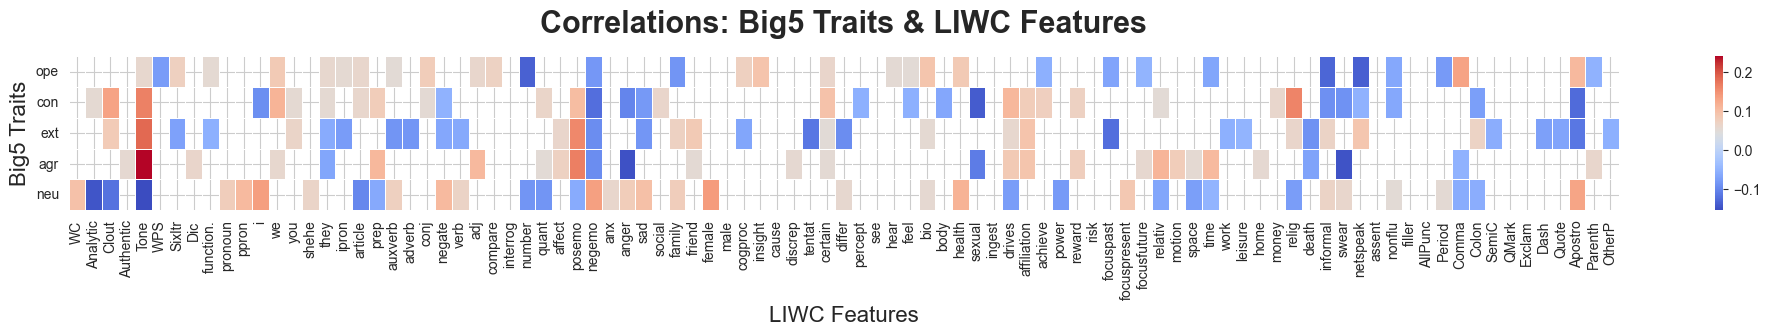

In [29]:
from scipy import stats

# Extracting relevant columns
data = train_df[ocean_liwc]

# Compute the correlation matrix
corr_matrix = data.corr()

# Isolating the correlations between Big5 traits and LIWC features
corr_subset = corr_matrix.loc[ocean, liwc]

#define threshold
threshold = 0.05

# mask
corr_mask = corr_subset.abs() <= threshold

# Creating the heatmap
plt.figure(figsize=(25, 2))
sns.heatmap(corr_subset, annot=False, cmap='coolwarm', linewidths=0.5, mask=corr_mask)
plt.title('Correlations: Big5 Traits & LIWC Features', fontsize=22, weight='bold', y=1.1)
plt.xlabel('LIWC Features', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Big5 Traits', fontsize=16)
plt.yticks(rotation=0);

- Features having a correlation higher than 0.05:

In [23]:
# store selected features in lists
ope_corr_selected = corr_subset.loc['ope', corr_subset.loc['ope'].abs() >= threshold].index.tolist()
con_corr_selected = corr_subset.loc['con', corr_subset.loc['con'].abs() >= threshold].index.tolist()
ext_corr_selected = corr_subset.loc['ext', corr_subset.loc['ext'].abs() >= threshold].index.tolist()
agr_corr_selected = corr_subset.loc['agr', corr_subset.loc['agr'].abs() >= threshold].index.tolist()
neu_corr_selected = corr_subset.loc['neu', corr_subset.loc['neu'].abs() >= threshold].index.tolist()

# display selected features
for trait in ocean:
    print(f"Trait: {trait}")
    print(7*'~')
    print(corr_subset.loc[trait, corr_subset.loc[trait].abs() >= 0.05].sort_values(ascending=False))
    print(30*'=')

Trait: ope
~~~~~~~
Comma          0.131310
Apostro        0.105699
insight        0.091919
bio            0.090748
we             0.083247
health         0.082568
conj           0.078032
Sixltr         0.072610
cogproc        0.072263
compare        0.069567
certain        0.061750
article        0.060419
adj            0.059745
Tone           0.059283
they           0.058672
ipron          0.054508
function.      0.053809
hear           0.051851
feel           0.050542
auxverb        0.050245
focusfuture   -0.050645
Parenth       -0.052311
achieve       -0.054763
nonflu        -0.064265
time          -0.066807
focuspast     -0.068529
WPS           -0.078397
Period        -0.080102
negemo        -0.083506
family        -0.086501
informal      -0.129779
number        -0.134848
netspeak      -0.136113
Name: ope, dtype: float64
Trait: con
~~~~~~~
Tone           0.163525
relig          0.159334
Clout          0.130953
we             0.112853
drives         0.108257
posemo         0.101273


### P-value matrix of OCEAN vs LIWC:
   - The `Bonferroni correction` was applied to address the multiple comparison issue arising from correlating 92 LIWC features with each of the 5 Big Five personality traits.

      - Formula: α* = α / n

      - Where:
        - α* is the adjusted (local) significance level for each trait.
        - α is the global significance level (typically 0.05).
        - n is the number of personality traits (5).
####

   > This method controls the Type-I error rate within each personality trait, ensuring statistical rigor in identifying significant correlations.

   > Aka. alpha accumulation.

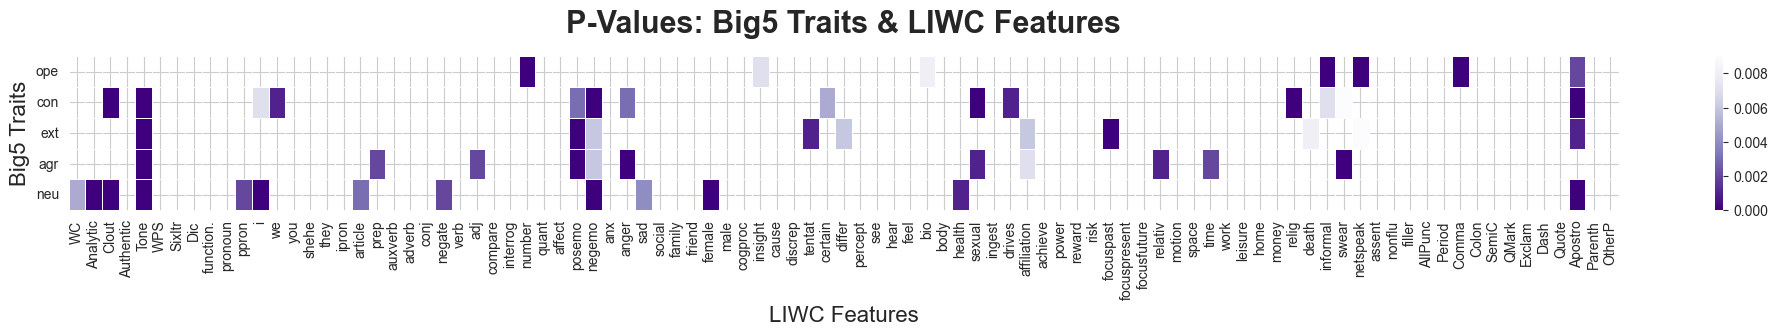

In [14]:
# Compute p-value matrix (Note: features with correlations with itself are removed)
pval_matrix = data.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(data.columns))

# Isolating the p-values between Big5 traits and LIWC features
pval_subset = pval_matrix.loc[ocean, liwc].round(3)

# Bonferroni correction
bonferoni_correction = 0.05 / len(ocean)

# define significance level
significance_level = bonferoni_correction

# create mask for p-values
pval_mask = pval_subset > significance_level

# Creating the heatmap
plt.figure(figsize=(25, 2))
sns.heatmap(pval_subset, annot=False, cmap='Purples_r', linewidths=0.5, mask=pval_mask)
plt.title('P-Values: Big5 Traits & LIWC Features', fontsize=22, weight='bold', y=1.1)
plt.xlabel('LIWC Features', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Big5 Traits', fontsize=16)
plt.yticks(rotation=0);

- Features having a p-value lower than α*:


In [15]:
# store selected features in lists
ope_pval_selected = pval_subset.loc['ope', pval_subset.loc['ope'] <= significance_level].index.tolist()
con_pval_selected = pval_subset.loc['con', pval_subset.loc['con'] <= significance_level].index.tolist()
ext_pval_selected = pval_subset.loc['ext', pval_subset.loc['ext'] <= significance_level].index.tolist()
agr_pval_selected = pval_subset.loc['agr', pval_subset.loc['agr'] <= significance_level].index.tolist()
neu_pval_selected = pval_subset.loc['neu', pval_subset.loc['neu'] <= significance_level].index.tolist()

# display selected features
for trait in ocean:
    print(f"Trait: {trait}")
    print(17*'~')
    print(pval_subset.loc[trait, pval_subset.loc[trait] <= significance_level].sort_values(ascending=False))
    print(30*'_')

Trait: ope
~~~~~~~~~~~~~~~~~
bio         0.008
insight     0.007
Apostro     0.002
number      0.000
informal    0.000
netspeak    0.000
Comma       0.000
Name: ope, dtype: float64
______________________________
Trait: con
~~~~~~~~~~~~~~~~~
swear       0.009
i           0.007
informal    0.007
certain     0.005
posemo      0.003
anger       0.003
we          0.001
drives      0.001
Clout       0.000
Tone        0.000
negemo      0.000
sexual      0.000
relig       0.000
Apostro     0.000
Name: con, dtype: float64
______________________________
Trait: ext
~~~~~~~~~~~~~~~~~
netspeak       0.009
death          0.008
negemo         0.006
differ         0.006
affiliation    0.006
tentat         0.001
Apostro        0.001
Tone           0.000
posemo         0.000
focuspast      0.000
Name: ext, dtype: float64
______________________________
Trait: agr
~~~~~~~~~~~~~~~~~
affiliation    0.007
negemo         0.006
prep           0.002
adj            0.002
time           0.002
sexual         0.001

- **`Features having a correaltion coefficient > 0.05 & p-value < α*:`**


In [186]:
# apply intersection to select features that are selected by both methods (correlation and p-value)
ope_selected = list(set(ope_corr_selected) & set(ope_pval_selected))
con_selected = list(set(con_corr_selected) & set(con_pval_selected))
ext_selected = list(set(ext_corr_selected) & set(ext_pval_selected))
agr_selected = list(set(agr_corr_selected) & set(agr_pval_selected))
neu_selected = list(set(neu_corr_selected) & set(neu_pval_selected))

print(f"Openness: {ope_selected};  ( {len(ope_selected)} items )")
print(f"Conscientiousness: {con_selected};  ( {len(con_selected)} items )")
print(f"Extroversion: {ext_selected};  ( {len(ext_selected)} items )")
print(f"Agreeableness: {agr_selected};  ( {len(agr_selected)} items )")
print(f"Neuroticism: {neu_selected};  ( {len(neu_selected)} items )")

Openness: ['bio', 'Comma', 'informal', 'Apostro', 'insight', 'number', 'netspeak'];  ( 7 items )
Conscientiousness: ['certain', 'relig', 'informal', 'we', 'sexual', 'Apostro', 'Clout', 'drives', 'swear', 'negemo', 'i', 'posemo', 'anger', 'Tone'];  ( 14 items )
Extroversion: ['tentat', 'death', 'Apostro', 'differ', 'focuspast', 'negemo', 'affiliation', 'posemo', 'Tone', 'netspeak'];  ( 10 items )
Agreeableness: ['sexual', 'prep', 'relativ', 'swear', 'negemo', 'affiliation', 'adj', 'posemo', 'anger', 'Tone', 'time'];  ( 11 items )
Neuroticism: ['ppron', 'negate', 'female', 'Apostro', 'Clout', 'health', 'negemo', 'article', 'sad', 'Analytic', 'WC', 'Tone', 'i'];  ( 13 items )


In [403]:
len(ope_corr_selected), len(ope_pval_selected), len(ope_selected)
len(con_corr_selected), len(con_pval_selected), len(con_selected)
len(ext_corr_selected), len(ext_pval_selected), len(ext_selected)
len(agr_corr_selected), len(agr_pval_selected), len(agr_selected)
len(neu_corr_selected), len(neu_pval_selected), len(neu_selected)

(47, 13, 13)

#### Store Predictions for final Cascade Layer:

In [187]:
predictions_df = pd.DataFrame()

#### ***1. Opennes***

- Fit Model:

In [188]:
xgb_o = XGBRegressor(
                n_estimators     = 75,
                max_depth        = 3,
                learning_rate    = 0.01,
                verbosity        = 1,
                objective        = 'reg:squarederror',
                random_state     = 42
)

xgb_o.fit(
    X_train[ope_selected],
    y_train['ope']
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- Evaluate:

In [189]:
regressor_evaluator(
            model   = xgb_o,
            X_train = X_train[ope_selected],
            y_train = y_train['ope'],
            X_test  = X_test[ope_selected],
            y_test  = y_test['ope'],
)

,Train,Test
R2 Score,0.105472,0.036311
RMSE,0.521967,0.539847


- Feature Importance:

In [190]:
#feature_importance_plot(
#                    model         = xgb_o,
#                    feature_names = ope_selected,
#                    figsize        = (4, 3),
#                    horizontal    = False
#)

- Store Predictions:

In [192]:
# predict on entire data and store them:
predictions_df['ope_pred'] = xgb_o.predict(X[ope_selected])
predictions_df.head(3)

,ope_pred
0,3.992812
1,3.936432
2,4.079393


#### ***2. Conscientiousness***

- Fit Model:

In [397]:
xgb_c = XGBRegressor(
                n_estimators     = 99,
                max_depth        = 3,
                learning_rate    = 0.01,
                verbosity        = 1,
                objective        = 'reg:squarederror',
                alpha            = 0.1,
                random_state     = 42

)

xgb_c.fit(
    X_train[con_selected],
    y_train['con']
)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=99, n_jobs=None,
             num_parallel_tree=None, ...)

- Evaluate:

In [398]:
regressor_evaluator(
            model   = xgb_c,
            X_train = X_train[con_selected],
            y_train = y_train['con'],
            X_test  = X_test[con_selected],
            y_test  = y_test['con'],
)

,Train,Test
R2 Score,0.143653,-0.004516
RMSE,0.654441,0.712977


#### ***3. Extraversion***

- Fit Model:

In [198]:
xgb_e = XGBRegressor(
                n_estimators     = 75,
                max_depth        = 3,
                learning_rate    = 0.01,
                verbosity        = 1,
                objective        = 'reg:squarederror',
                random_state     = 42
)

xgb_e.fit(
    X_train[ext_selected],
    y_train['ext']
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- Evaluate:

In [199]:
regressor_evaluator(
            model   = xgb_e,
            X_train = X_train[ext_selected],
            y_train = y_train['ext'],
            X_test  = X_test[ext_selected],
            y_test  = y_test['ext'],
)

,Train,Test
R2 Score,0.105994,0.022178
RMSE,0.789516,0.854696


- Feature Importance:

In [200]:
#feature_importance_plot(
#                    model         = xgb_e,
#                    feature_names = ext_selected,
#                    figsize        = (4, 3),
#                    horizontal    = False
#)

- Store Predictions:

In [215]:
predictions_df['ext_pred'] = xgb_e.predict(X[ext_selected])
predictions_df.head(3)

,ope_pred,ext_pred
0,3.992812,3.138542
1,3.936432,3.248264
2,4.079393,3.171966


#### ***4. Agreeableness***

- Fit Model:

In [201]:
xgb_a = XGBRegressor(
                n_estimators     = 75,
                max_depth        = 3,
                learning_rate    = 0.01,
                verbosity        = 1,
                objective        = 'reg:squarederror',
                random_state     = 42
)

xgb_a.fit(
    X_train[agr_selected],
    y_train['agr']
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- Evaluate:

In [202]:
regressor_evaluator(
            model   = xgb_a,
            X_train = X_train[agr_selected],
            y_train = y_train['agr'],
            X_test  = X_test[agr_selected],
            y_test  = y_test['agr'],
)

,Train,Test
R2 Score,0.111521,0.039243
RMSE,0.621870,0.606856


- Feature Importance:

In [203]:
#feature_importance_plot(
#                    model         = xgb_a,
#                    feature_names = agr_selected,
#                    figsize        = (4, 3),
#                    horizontal    = False
#)

- Store Predictions:

In [216]:
predictions_df['agr_pred'] = xgb_a.predict(X[agr_selected])
predictions_df.head(3)

,ope_pred,ext_pred,agr_pred
0,3.992812,3.138542,3.380897
1,3.936432,3.248264,3.536933
2,4.079393,3.171966,3.664716


#### ***5. Neuroticism***

- Fit Model:

In [204]:
xgb_n = XGBRegressor(
                n_estimators     = 75,
                max_depth        = 3,
                learning_rate    = 0.01,
                verbosity        = 1,
                objective        = 'reg:squarederror',
                random_state     = 42
)

xgb_n.fit(
    X_train[neu_selected],
    y_train['neu']
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- Evaluate:

In [205]:
regressor_evaluator(
            model   = xgb_n,
            X_train = X_train[neu_selected],
            y_train = y_train['neu'],
            X_test  = X_test[neu_selected],
            y_test  = y_test['neu'],
)

,Train,Test
R2 Score,0.122343,0.029857
RMSE,0.778729,0.846062


- Feature Importance:

In [206]:
#feature_importance_plot(
#                    model         = xgb_n,
#                    feature_names = neu_selected,
#                    figsize        = (4, 3),
#                    horizontal    = False
#)

- Store Predictions:

In [217]:
predictions_df['neu_pred'] = xgb_n.predict(X[neu_selected])
predictions_df.head(3)

,ope_pred,ext_pred,agr_pred,neu_pred
0,3.992812,3.138542,3.380897,2.965991
1,3.936432,3.248264,3.536933,2.911939
2,4.079393,3.171966,3.664716,2.783992


### ***2) `Predict Consumption Behavior with Big5 Predictions`***
---

#### Append consumption targets to predictions_df:

In [405]:
targets        = ['smoking_status', 'alcohol_status', 'drug_status']
predictions_df = pd.concat([predictions_df, df1[targets]], axis=1)
display_data_shape(predictions_df)
predictions_df.head(3)

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,082
 - Number of columns: 13


,ope_pred,ext_pred,agr_pred,neu_pred,smoking_status,alcohol_status,drug_status,smoking_status,alcohol_status,drug_status,smoking_status,alcohol_status,drug_status
0,3.992812,3.138542,3.380897,2.965991,1,1,1,1,1,1,1,1,1
1,3.936432,3.248264,3.536933,2.911939,0,1,0,0,1,0,0,1,0
2,4.079393,3.171966,3.664716,2.783992,0,0,0,0,0,0,0,0,0


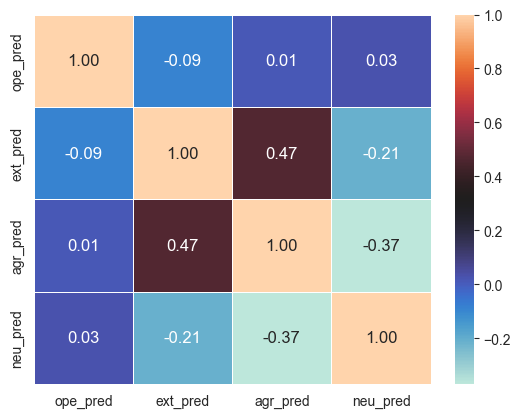

In [408]:
features_corr = predictions_df[[c for c in predictions_df.columns if c not in targets]].corr().round(2)
sns.heatmap(features_corr, annot=True, cmap='icefire', linewidths=0.5, annot_kws={'size': 12}, fmt=".2f");

#### Stratified Train-Test-Split:

In [219]:
# define features
features = [c for c in predictions_df.columns if c not in targets]

# define X and y
X = predictions_df[features]

y_smoking, y_alcohol, y_drug = predictions_df['smoking_status'], predictions_df['alcohol_status'], predictions_df['drug_status']

# split data for each of the three targets into train and test sets:

'Smoking'
X_train_smoke, X_test_smoke, \
    y_train_smoke, y_test_smoke = train_test_split(
                                            X, y_smoking, test_size=0.2, stratify=y_smoking, random_state=42
    )

'Alchohol'
X_train_alc, X_test_alc, \
    y_train_alc, y_test_alc = train_test_split(
                                            X, y_alcohol, test_size=0.2, stratify=y_alcohol, random_state=42
    )

'Drugs'
X_train_drug, X_test_drug, \
    y_train_drug, y_test_drug = train_test_split(
                                            X, y_drug, test_size=0.2, stratify=y_drug, random_state=42
    )

#### Compute weights for Models:

In [220]:
#### Compute weights for Models:
weight_smoke = round(y_train_smoke.value_counts()[0] / y_train_smoke.value_counts()[1], 2)
weight_alc   = round(y_train_alc.value_counts()[0] / y_train_alc.value_counts()[1], 2)
weight_drugs = round(y_train_drug.value_counts()[0] / y_train_drug.value_counts()[1], 2)

# display as dataframe
pd.DataFrame(
        data    = [[weight_smoke, weight_alc, weight_drugs]],
        columns = ['smoking_status', 'alcohol_status', 'drug_status'],
        index   = ['weights']
).transpose()

,weights
smoking_status,3.14
alcohol_status,1.11
drug_status,4.44


#### Final Prediction Layer:

##### 1) Smoking:

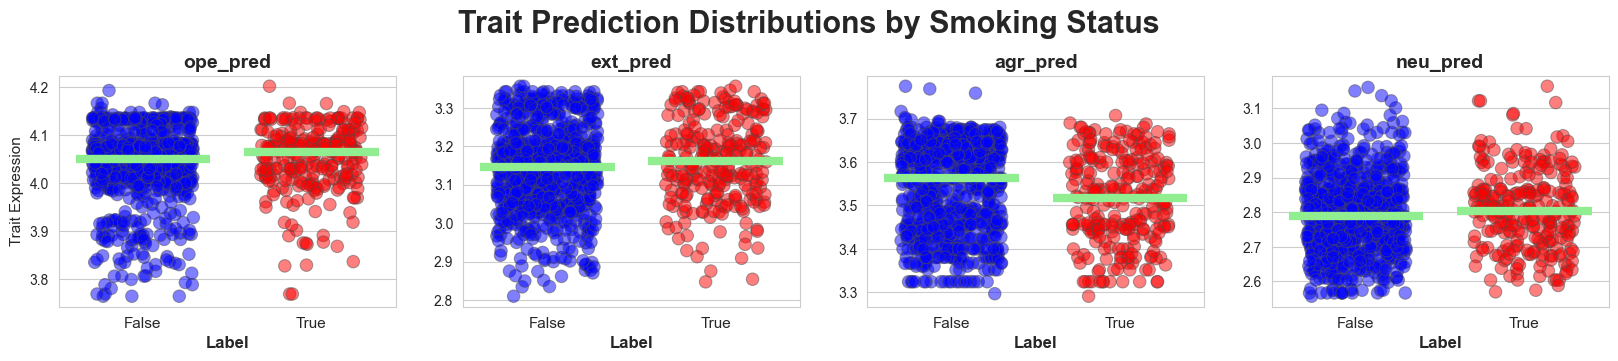

In [369]:
plot_continuous_features(
                    df       = predictions_df,
                    features = ['ope_pred', 'ext_pred', 'agr_pred', 'neu_pred'],
                    target   = 'smoking_status',
                    title    = 'Trait Prediction Distributions by Smoking Status',
                    figsize   = (20, 3)
)

- Base Model:

In [242]:
xgb1 = XGBClassifier(
                n_estimators     = 99,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_smoke,
                random_state     = 42
)

xgb1.fit(
    X_train_smoke,
    y_train_smoke
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=99, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

- Evaluate:

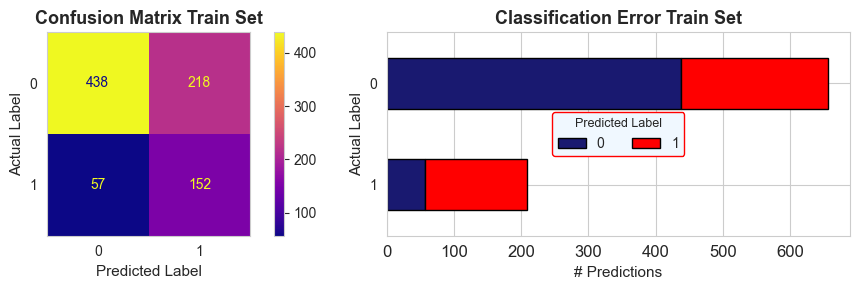

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 656 (76.0%)
- Class 1: 209 (24.0%)

Classification Report Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.884848,0.667683,0.761077,656.000000
1,0.410811,0.727273,0.525043,209.000000
accuracy,0.682081,0.682081,0.682081,0.682081
macro avg,0.647830,0.697478,0.643060,865.000000
weighted avg,0.770312,0.682081,0.704047,865.000000


In [243]:
classification_evaluation_report(
                            model       = xgb1,
                            X           = X_train_smoke,
                            y           = y_train_smoke,
                            title_suffix = 'Train Set',
                            figsize      = (10, 3)
)

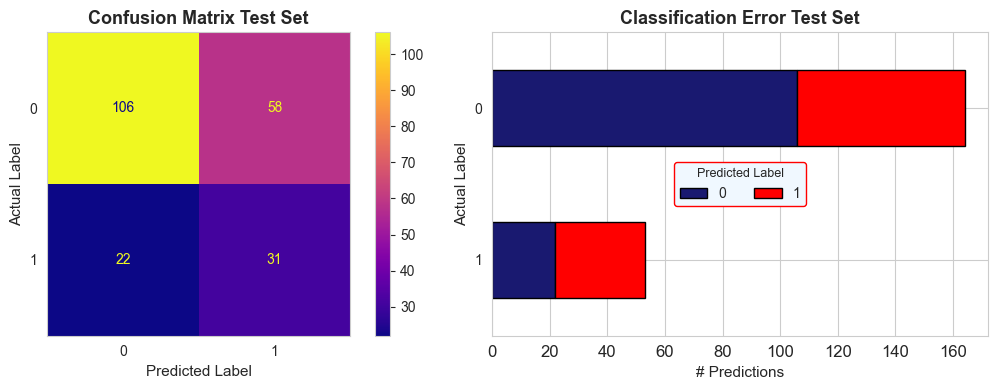

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 164 (76.0%)
- Class 1: 53 (24.0%)

Classification Report Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.828125,0.646341,0.726027,164.000000
1,0.348315,0.584906,0.436620,53.000000
accuracy,0.631336,0.631336,0.631336,0.631336
macro avg,0.588220,0.615624,0.581324,217.000000
weighted avg,0.710936,0.631336,0.655343,217.000000


In [244]:
classification_evaluation_report(
                            model       = xgb1,
                            X           = X_test_smoke,
                            y           = y_test_smoke,
                            title_suffix = 'Test Set'
)

##### 2) Alchohol:

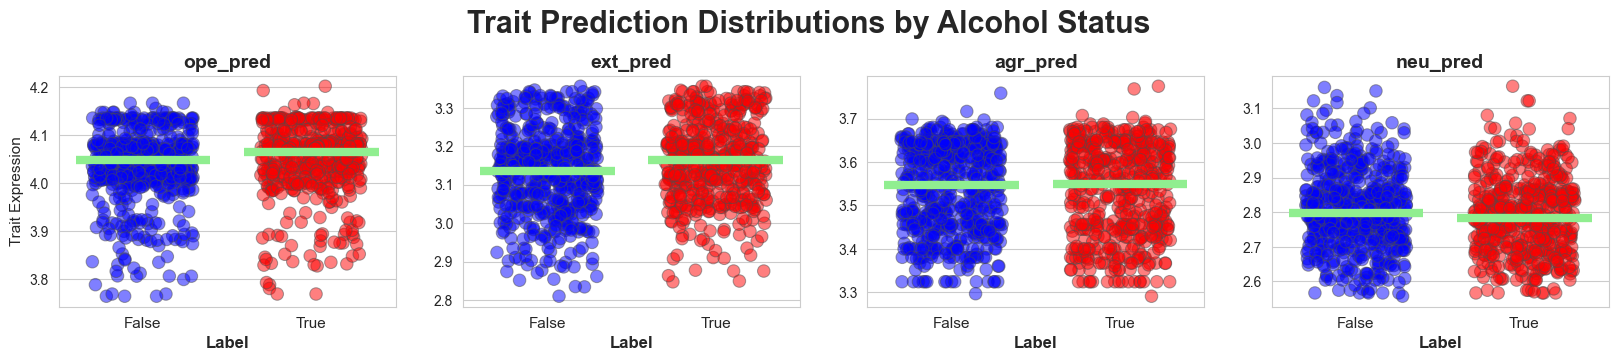

In [360]:
plot_continuous_features(
                    df       = predictions_df,
                    features = ['ope_pred', 'ext_pred', 'agr_pred', 'neu_pred'],
                    target   = 'alcohol_status',
                    title    = 'Trait Prediction Distributions by Alcohol Status',
                    figsize   = (20, 3)
)

- Base Model:

In [245]:
xgb2 = XGBClassifier(
                n_estimators     = 99,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                random_state     = 42
                # Experiment by introducing different weights to boost prediction of positive class (f1 60% for both classes)


xgb2.fit(
    X_train_alc,
    y_train_alc
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=99, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

- Evaluate:

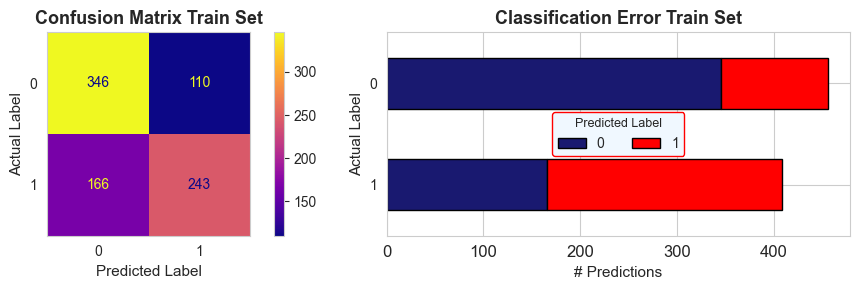

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 456 (53.0%)
- Class 1: 409 (47.0%)

Classification Report Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.675781,0.758772,0.714876,456.000000
1,0.688385,0.594132,0.637795,409.000000
accuracy,0.680925,0.680925,0.680925,0.680925
macro avg,0.682083,0.676452,0.676336,865.000000
weighted avg,0.681741,0.680925,0.678430,865.000000


In [246]:
classification_evaluation_report(
                            model       = xgb2,
                            X           = X_train_alc,
                            y           = y_train_alc,
                            title_suffix = 'Train Set',
                            figsize      = (10, 3)
)

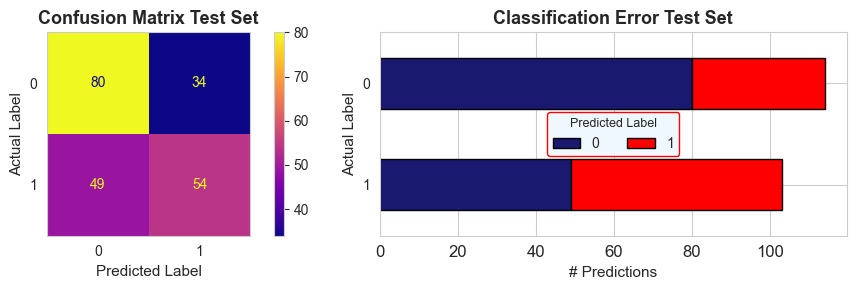

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 114 (53.0%)
- Class 1: 103 (47.0%)

Classification Report Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.620155,0.701754,0.658436,114.000000
1,0.613636,0.524272,0.565445,103.000000
accuracy,0.617512,0.617512,0.617512,0.617512
macro avg,0.616896,0.613013,0.611941,217.000000
weighted avg,0.617061,0.617512,0.614298,217.000000


In [247]:
classification_evaluation_report(
                            model       = xgb2,
                            X           = X_test_alc,
                            y           = y_test_alc,
                            title_suffix = 'Test Set',
                            figsize      = (10, 3)
)

- Threshold Analysis:

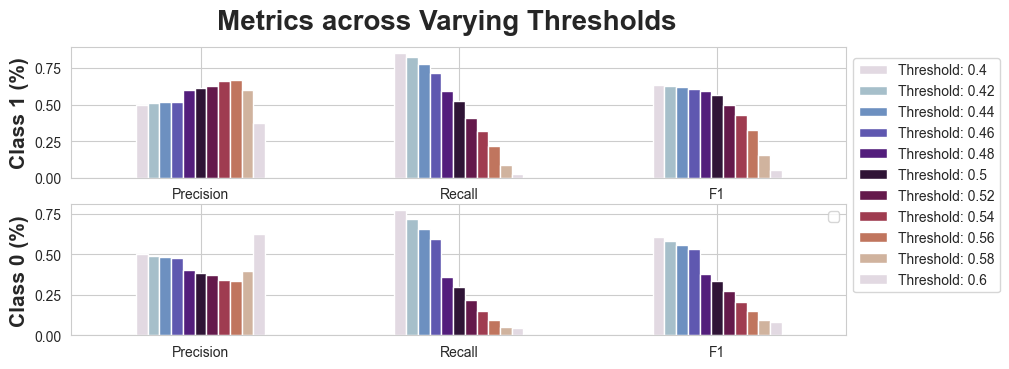

In [263]:
threshold_analysis_barplot(
                            model       = xgb2,
                            X           = X_test_alc,
                            y           = y_test_alc,
                            thresholds  = np.arange(0.4, 0.62, 0.02).round(2),
                            figsize      = (10, 3.75)
)

- Evaluation with adjusted Thresholds:

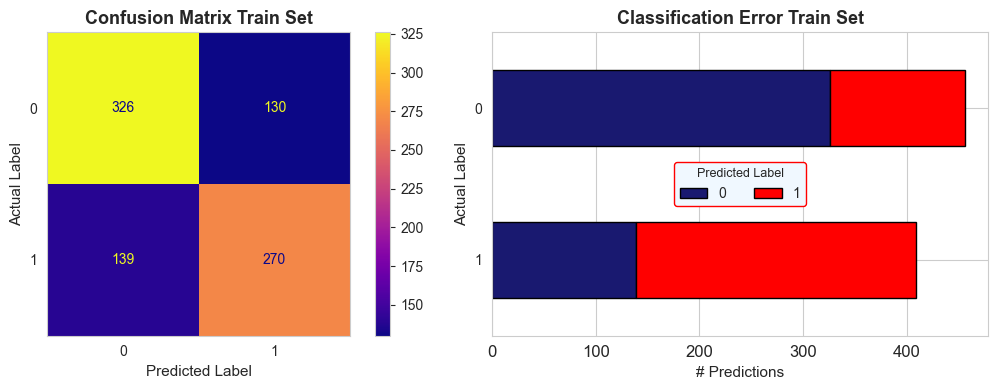

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 456 (53.0%)
- Class 1: 409 (47.0%)

Classification Report Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.701075,0.714912,0.707926,456.000000
1,0.675000,0.660147,0.667491,409.000000
accuracy,0.689017,0.689017,0.689017,0.689017
macro avg,0.688038,0.687529,0.687708,865.000000
weighted avg,0.688746,0.689017,0.688807,865.000000


In [373]:
classification_evaluation_report(
                            model       = xgb2,
                            X           = X_train_alc,
                            y           = y_train_alc,
                            threshold   = 0.49,
                            title_suffix = 'Train Set'
)

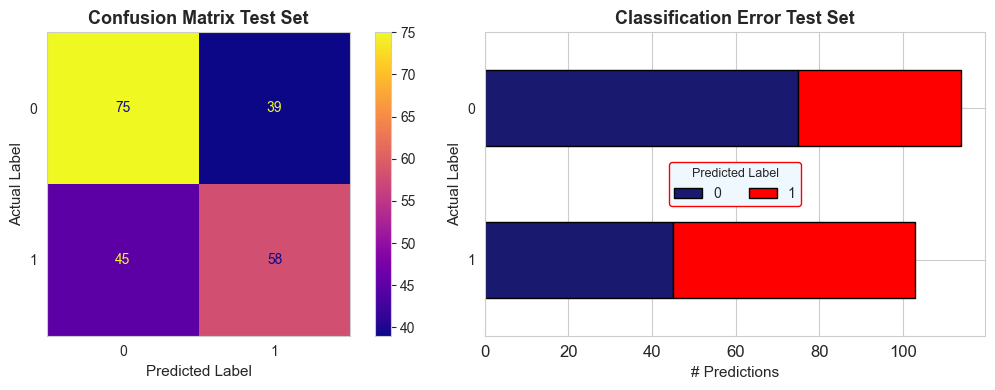

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 114 (53.0%)
- Class 1: 103 (47.0%)

Classification Report Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.625000,0.657895,0.641026,114.000000
1,0.597938,0.563107,0.580000,103.000000
accuracy,0.612903,0.612903,0.612903,0.612903
macro avg,0.611469,0.610501,0.610513,217.000000
weighted avg,0.612155,0.612903,0.612060,217.000000


In [374]:
classification_evaluation_report(
                            model       = xgb2,
                            X           = X_test_alc,
                            y           = y_test_alc,
                            threshold   = 0.49,
                            title_suffix = 'Test Set'
)

- `Conclusion`:

     - Our cascade model, with a threshold of 0.49, demonstrates its ability to effectively differentiate between consumer and non-consumer behaviors, indicating discernible patterns within the cascade flow of data. The balanced precision, recall, and F1 scores across both classes, and a delta less than 0.1 between training and testing, suggest a robust model without significant overfitting. This consistent performance across datasets validates the model's generalizability and underscores the effectiveness of our approach in leveraging linguistic patterns to predict personality traits, which in turn informs consumption behaviors.

##### 3) Drugs

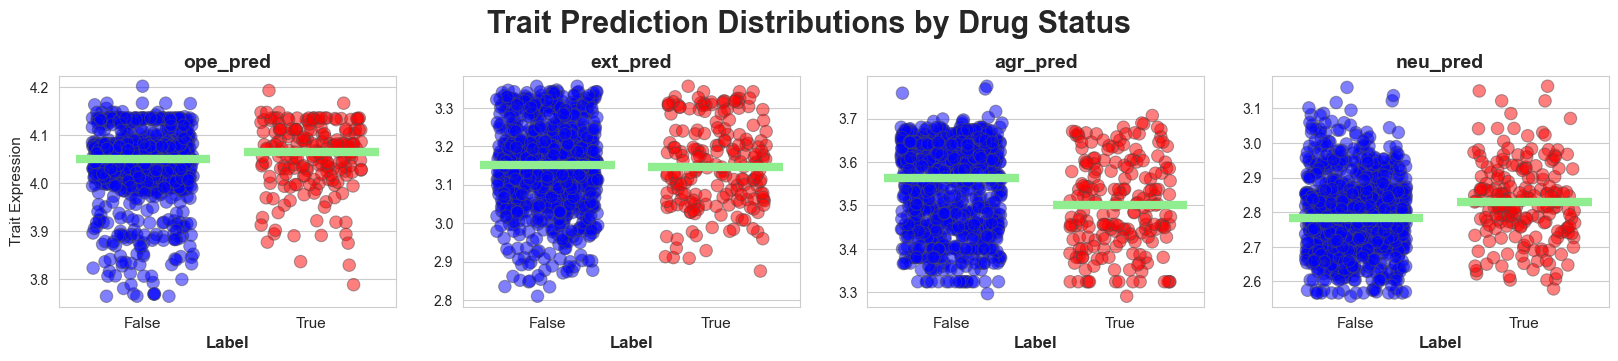

In [362]:
plot_continuous_features(
                    df       = predictions_df,
                    features = ['ope_pred', 'ext_pred', 'agr_pred', 'neu_pred'],
                    target   = 'drug_status',
                    title    = 'Trait Prediction Distributions by Drug Status',
                    figsize   = (20, 3)
)

- Base Model:

In [379]:
xgb3 = XGBClassifier(
                n_estimators     = 101,
                max_depth        = 3,
                learning_rate    = 0.015,
                verbosity        = 1,
                objective        = 'binary:logistic',
                scale_pos_weight = weight_drugs,
                random_state     = 42
)

xgb3.fit(
    X_train_drug,
    y_train_drug
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=101, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

- Evaluate:

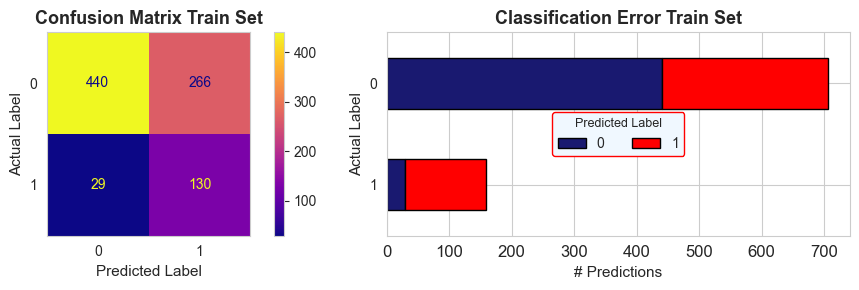

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 706 (82.0%)
- Class 1: 159 (18.0%)

Classification Report Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.938166,0.623229,0.748936,706.000000
1,0.328283,0.817610,0.468468,159.000000
accuracy,0.658960,0.658960,0.658960,0.658960
macro avg,0.633225,0.720420,0.608702,865.000000
weighted avg,0.826061,0.658960,0.697382,865.000000


In [380]:
classification_evaluation_report(
                            model       = xgb3,
                            X           = X_train_drug,
                            y           = y_train_drug,
                            title_suffix = 'Train Set',
                            figsize      = (10, 3)
)

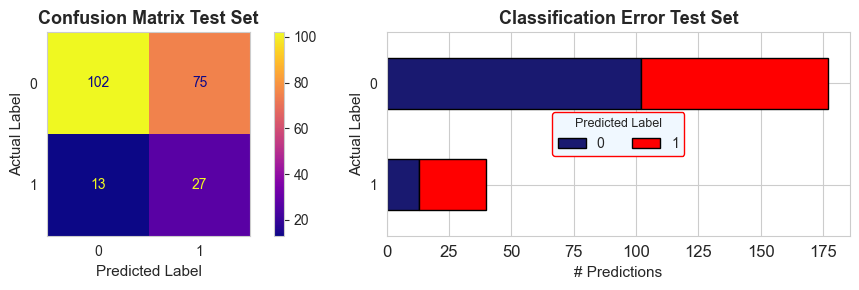

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 177 (82.0%)
- Class 1: 40 (18.0%)

Classification Report Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.886957,0.576271,0.698630,177.000000
1,0.264706,0.675000,0.380282,40.000000
accuracy,0.594470,0.594470,0.594470,0.594470
macro avg,0.575831,0.625636,0.539456,217.000000
weighted avg,0.772256,0.594470,0.639948,217.000000


In [381]:
classification_evaluation_report(
                            model       = xgb3,
                            X           = X_test_drug,
                            y           = y_test_drug,
                            title_suffix = 'Test Set',
                            figsize      = (10, 3)
)

- Threshold Analysis:

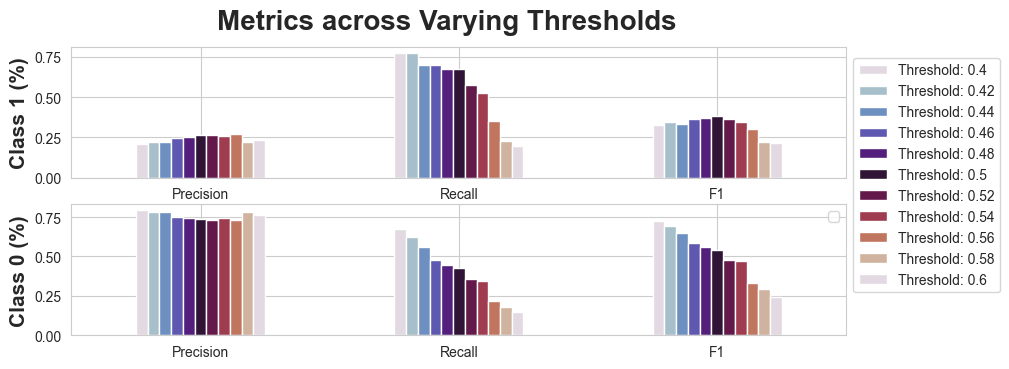

In [382]:
threshold_analysis_barplot(
                            model       = xgb3,
                            X           = X_test_drug,
                            y           = y_test_drug,
                            thresholds  = np.arange(0.4, 0.62, 0.02).round(2),
                            figsize      = (10, 3.75)
)

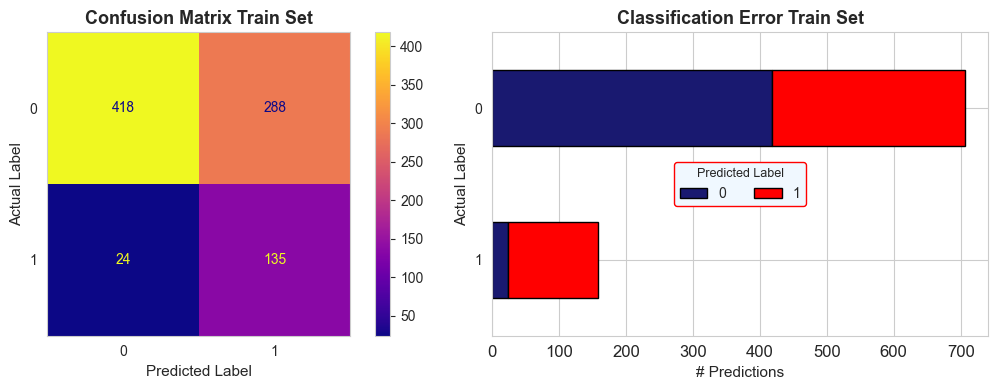

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 706 (82.0%)
- Class 1: 159 (18.0%)

Classification Report Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.945701,0.592068,0.728223,706.000000
1,0.319149,0.849057,0.463918,159.000000
accuracy,0.639306,0.639306,0.639306,0.639306
macro avg,0.632425,0.720562,0.596070,865.000000
weighted avg,0.830532,0.639306,0.679640,865.000000


In [388]:
classification_evaluation_report(
                            model       = xgb3,
                            X           = X_train_drug,
                            y           = y_train_drug,
                            threshold   = 0.48,
                            title_suffix = 'Train Set'
)

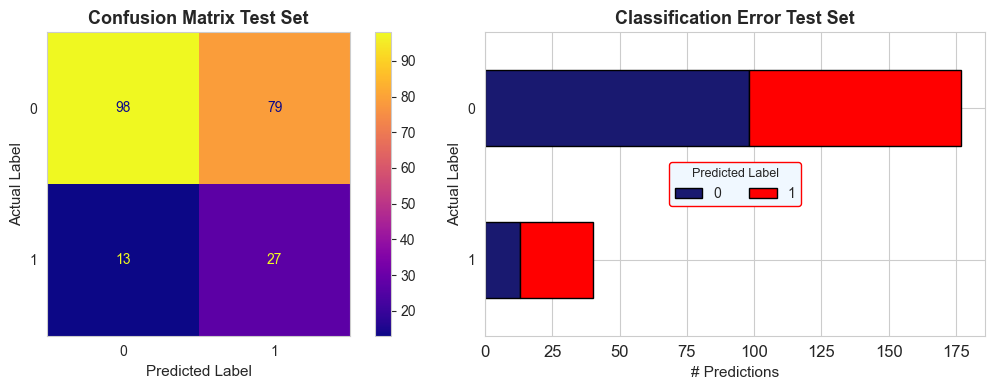

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 177 (82.0%)
- Class 1: 40 (18.0%)

Classification Report Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.882883,0.553672,0.680556,177.000000
1,0.254717,0.675000,0.369863,40.000000
accuracy,0.576037,0.576037,0.576037,0.576037
macro avg,0.568800,0.614336,0.525209,217.000000
weighted avg,0.767092,0.576037,0.623285,217.000000


In [389]:
classification_evaluation_report(
                            model       = xgb3,
                            X           = X_test_drug,
                            y           = y_test_drug,
                            threshold   = 0.48,
                            title_suffix = 'Test Set'
)